In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sb
import coremltools
%matplotlib inline


In [56]:
data=pd.read_csv('preprocessed.csv')

data=data.drop(['Unnamed: 0'],1)
data.head()
#print(data.columns)


,age,chest_pain,rest_bpress,blood_sugar,rest_electro,max_heart_rate,exercice_angina,disease
0,43.0,asympt,140.0,0,normal,135.0,1.0,1.0
1,39.0,atyp_angina,130.0,0,normal,160.0,1.0,0.0
2,39.0,non_anginal,160.0,1,normal,160.0,0.0,0.0
3,50.0,asympt,140.0,0,normal,135.0,0.0,0.0
4,59.0,asympt,140.0,1,left_vent_hyper,119.0,1.0,1.0


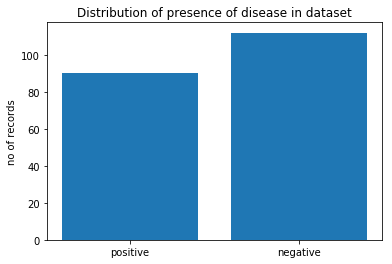

<Figure size 432x288 with 0 Axes>

In [57]:
data['disease'].value_counts()
yes_count=len(data[data['disease']==1])
no_count=len(data[data['disease']==0])
total=data.shape[0]
y_axis=[yes_count,no_count]
x_labels=['positive','negative']
plt.bar(x_labels,y_axis)
plt.ylabel('no of records')
plt.title('Distribution of presence of disease in dataset')
plt.show()
plt.savefig('distribution.png')



In [58]:
percent_positive=(yes_count/total)*100
percent_negative=(no_count/total)*100
print('percentage of positive records in dataset:',percent_positive)
print('percentage of negative records in dataset:',percent_negative)


percentage of positive records in dataset: 44.554455445544555
percentage of negative records in dataset: 55.44554455445545


In [59]:
df=data.groupby('disease').median()

print('median age of patients having disease: ',df['age'][1])
print('median age of not patients having disease: ',df['age'][0])
print('median blood pressure of patients having disease: ',df['rest_bpress'][1])
print('median blood pressure of not patients having disease: ',df['rest_bpress'][0])
print('median heart rate of patients having disease: ',df['max_heart_rate'][1])
print('median heart rate of not patients having disease: ',df['max_heart_rate'][0])

median age of patients having disease:  50.0
median age of not patients having disease:  46.5
median blood pressure of patients having disease:  135.0
median blood pressure of not patients having disease:  130.0
median heart rate of patients having disease:  125.5
median heart rate of not patients having disease:  145.0


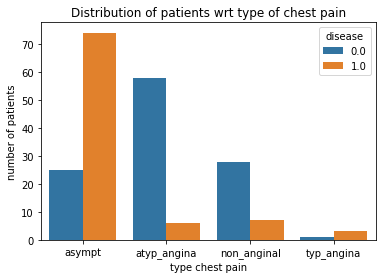

In [89]:

table=pd.crosstab(data.chest_pain,data.disease)
stacked = table.stack().reset_index().rename(columns={0:'value'})
sb.barplot(x=stacked.chest_pain, y=stacked.value, hue=stacked.disease)
plt.title('Distribution of patients wrt type of chest pain')
plt.xlabel('type chest pain')
plt.ylabel('number of patients')
plt.savefig('chest_pain_distribution.png')



90


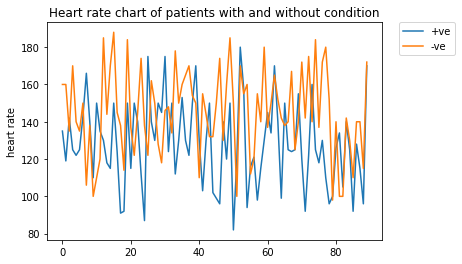

<Figure size 432x288 with 0 Axes>

In [124]:

y_axis1=np.array(data[data['disease']==1].max_heart_rate)
y_axis2=np.array(data[data['disease']==0].max_heart_rate)
x_axis=[]
minimum=min(len(y_axis1),len(y_axis2))
print(minimum)
y_axis2=y_axis2[:minimum]
y_axis1=y_axis1[:minimum]
for i in range(0,minimum):
    x_axis.append(i)
line_up=plt.plot(x_axis,y_axis1,label='+ve')
line_down=plt.plot(x_axis,y_axis2,label='-ve')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.ylabel('heart rate')

plt.title('Heart rate chart of patients with and without condition')
plt.show()
plt.savefig('heartratecomparison.png')